
# Lecture 1: Intro to Jupyter notebooks, Python, & GitHub
ENVR 890-010: Python for Environmental Research, Fall 2021

August 20, 2021

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Jupyter notebooks!
Jupyter notebooks will be the primary tool used for instruction and exercises in this class. Jupyter allows us to seamlessly write "mixed media" documents that combine text, code, figures, tables, etc. This makes it a great learning and science communication tool. It is also a fast, easy way to analyze your data interactively. 

Each **cell** in a Jupyter notebook is either a markdown cell (like this one) containing text, or a code cell (see below) that can be run interactively in a programming language such as Python. To **execute/run** a cell, whether markdown or code, press ``Shift`` + ``Enter``. 

Code cells will have open brackets to the left of the cell, if it has not yet been run. While it is running, the brackets will contain an ``*``, and after it completes, the brackets will contain a number designating the order that the cells are run in. 

Order matters for code cells, because variables are shared across cells. This will make more sense soon. Markdown cells do not have any brackets or numbers, since their order of execution does not matter.

To rerun the entire notebook at once, choose ``Restart & run all`` from the ``Kernel`` tab. 

If a cell is selected but **inactive**, it will be surrounded by a blue box. An **active** cell will be surrounded by a green box, meaning you can edit the cell by typing. You can activate an **inactive** cell  by double clicking, or pressing ``Enter``. You can make an active cell inactive by pressing ``Esc``. Here is an edit.

When a cell is inactive, the following commands are useful:
- To turn a markdown cell into a code cell, press ``y``. To turn a code cell into a markdown cell, press ``m``.
- To create a new cell below the current cell, press ``b``. For a new cell above, press ``a``
- To delete a cell, press ``d`` twice.
- Up and down arrows can be used to move between cells.
- To copy a cell, press ``c``.
- To paste a cell, press ``v``.
- To Find (and replace), press ``f``.

- Split a cell in half at the curser using ``Ctrl`` + ``Shift`` + ``-``

Many more useful commands can be found [here](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330). **Also note small differences for MacOS users (often use ``Cmd`` instead of ``Ctrl``)**. I will default to the Windows commands throughout these notes.

## Markdown cells
Markdown cells turn plain text into fancy rendered text using standard rules. For example, here are some different headers (compare to big ones at the top).

### Smaller header
#### Smaller still
##### Even smaller
Normal text with **bold** or *italics*

I can also do enumerated lists 
1. first
1. second
    1. third

And non-enumerated lists
- first
- second
    - third

I can also write equations using Latex notation:

$$a^2 + b^2 = c^2$$

where $a=\sqrt{\text{python}}$, $b=\sqrt{\text{jupyter}}$, and $c=\sqrt{\text{so fun}}$.

And hyperlinks, like this [Jupyter markdown documentation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) with more info.

And the moment you've all been waiting for: a table of cute animals eating

| Animal    | Gif                                             | Cuteness score |
| ------    | --------                                        | --------       |
| Sloth     | <img src="sloth.gif" style="width: 250px;" />   | 99             |
| Red panda | <img src="redpanda.gif" style="width: 250px;"/> | 97             |
| Turtle    | <img src="turtle.gif" style="width: 250px;"/>   | 98             |

## Code cells
**Code cells** are the other type of cell, in addition to **Markdown cells**. These contain blocks of code that can be run interactively within the notebook.

Note that this notebook has been set up to run Python 3, but it is also possible to run other "Kernels", such as Python 2, R, Julia, Ruby, Haskell, etc.

Within a code block, **comments** are preceded by one or more ``#``, and are not actually executed commands. All uncommented lines are executed by the computer and must be valid Python statements. A line (or selection of lines) can be commented or uncommented with ``Ctrl`` + ``/``.

In [1]:
## this is a python comment. below are python statements.
x = 5
y = 6
print(x + y)

11


In [2]:
y = 7
print(x + y)

12


Now we will go through some quick examples of running code cells. Don't worry about understanding the code yet. This is just a demo to show you the types of things we can do in Python + Jupyter.

### import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import data

In [4]:
# import data on February snow, April snow, annual hydropower generation, annual average power price, and annual revenue for a hydropower producing utility in California, from 1988-2016
data = pd.read_csv('historical_data.csv', sep = ' ', index_col=0)
data.columns = ['snowFeb','snowApr','hydropower','powerPrice','revenue']
print(data.shape)

(29, 5)


In [5]:
data.head()

,snowFeb,snowApr,hydropower,powerPrice,revenue
1988,21.0,19.7,1.422674,37.483486,121.021019
1989,17.2,26.3,1.460064,46.623459,123.020829
1990,5.4,15.2,1.631492,37.981812,127.945880
1991,2.5,21.4,1.241667,29.341614,112.712158
1992,9.4,17.3,1.300621,46.140473,116.300901


In [6]:
data.tail()

,snowFeb,snowApr,hydropower,powerPrice,revenue
2012,7.2,14.8,1.086853,42.563617,105.442917
2013,19.0,17.7,1.290264,38.226268,113.034683
2014,3.0,16.0,1.038833,45.803822,106.157363
2015,5.0,4.0,1.112580,32.431265,107.689465
2016,19.0,26.5,1.447377,45.154503,125.867679


### plot data

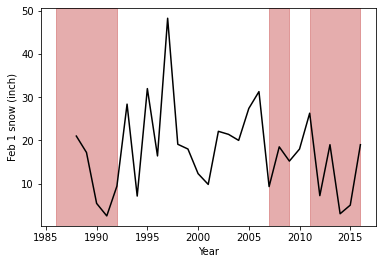

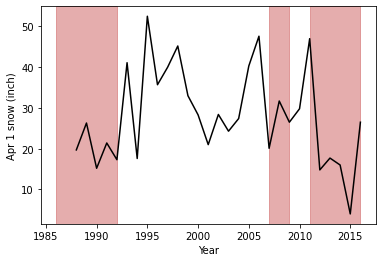

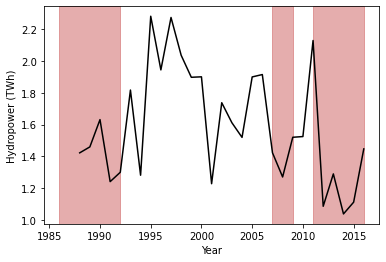

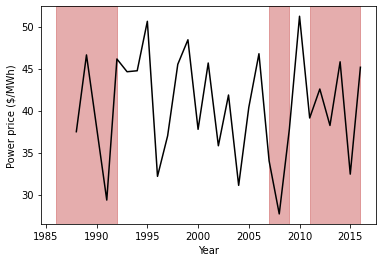

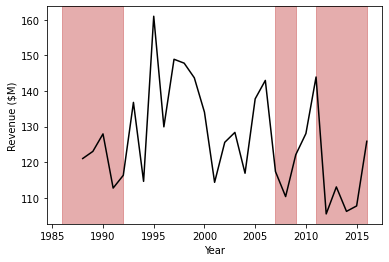

In [7]:
#  See statewide drought years from [Wikipedia](https://en.wikipedia.org/wiki/Droughts_in_California)
drought_start = [1986, 2007, 2011]
drought_end = [1992, 2009, 2016]

# function for plotting each time series. Drought years designated with red bands.
def plot_time_series(time_series, ylabel):
    fig = plt.figure()
    plt.plot(time_series, color='k')
    for i in range(len(drought_start)):
        plt.axvspan(drought_start[i], drought_end[i], color='indianred', alpha=0.5)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

# y axis labels
ylabels = ['Feb 1 snow (inch)', 'Apr 1 snow (inch)', 'Hydropower (TWh)', 'Power price ($/MWh)', 'Revenue ($M)']

# plot each time series
for i, d in enumerate(data.iteritems()):
    plot_time_series(d[1], ylabels[i])


<Figure size 432x288 with 0 Axes>

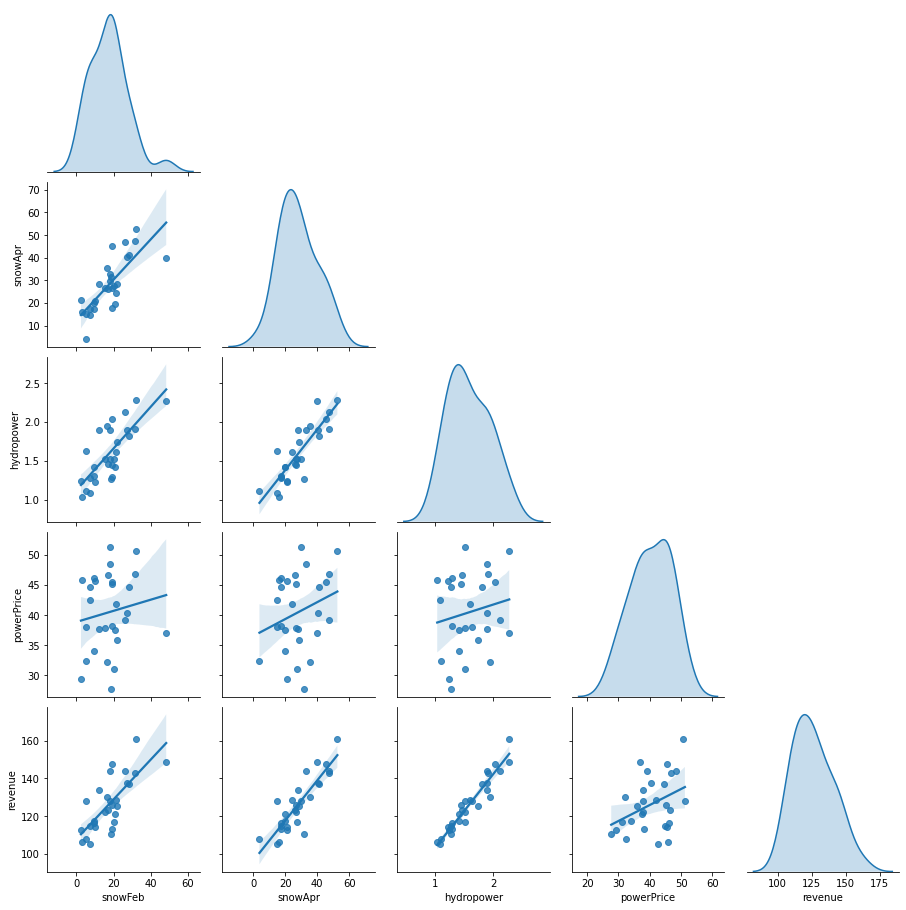

In [8]:
# pairplot to see relationships
fig = plt.figure()
sns.pairplot(data, corner=True, kind='reg', diag_kind='kde')

## Intro to Python
### What is code? 
**A caveat: I am not a computer scientist.** My domain of expertise is water resources systems, and computer programming can be used to solve a lot of interesting problems in this field. A real computer scientist might quibble with some of my definitions in this section (and throughout the course). But what is important, in my opinion, is that these definitions provide a useful intuition that allows us to apply programming languages like Python to our research with relative ease.

Any computer code is simply a list of instructions for the computer to follow. At the most basic level ("machine code"), computing instructions tell the central processing unit (CPU) how to manipulate bits of information to produce new, useful bits of information. Other types of instructions tell the computer how to move bits of information from short term memory (RAM) or long term memory (e.g., your hard drive or "the cloud") to the CPU for processing, or else from the CPU to short or long term memory for storage. However, machine code is difficult, tedious, and slow to write by hand. 

Enter programming languages. Programming languages like Python allow us to write simpler, more readable ("higher-level") computer code. The Python "interpreter" acts like a Rosetta Stone that translates the simpler Python code (written in the Python "language") into more detailed and complex machine code behind the scenes. 

### What is Python?
[Python was created as a hobby/side project by Guido van Rossum](https://www.techrepublic.com/article/python-is-eating-the-world-how-one-developers-side-project-became-the-hottest-programming-language-on-the-planet/) and released in 1991. It is free and [open source](https://opensource.com/resources/what-open-source), meaning that the language's source code is openly available to all, and anyone can contribute to improve it. [According to van Rossum](http://neopythonic.blogspot.com/2016/04/kings-day-speech.html), this is one of the main reason's Python has been so successful:

> But what is the idea of Python? Why is it so successful? How does Python distinguish itself from other programming languages? (Why are you all staring at me like that?) I have many answers, some quite technical, some from my specific skills and experience at the time, some just about being in the right place at the right time. But I believe the most important idea is that Python is developed on the Internet, entirely in the open, by a community of volunteers (but not amateurs!) who feel passion and ownership.

Compared to "lower-level" programming languages like C, Python puts an emphasis on readability and simplicity (you will often read that "Pythonic" code should be "beautiful"). This helps to accelerate the pace of program development and improve the sharing of ideas. Again according to van Rossum,

> But I would like to say a few things about what programming languages mean to the people who use them — programmers. Typically when you ask a programmer to explain to a lay person what a programming language is, they will say that it is how you tell a computer what to do. But if that was all, why would they be so passionate about programming languages when they talk among themselves? In reality, programming languages are how programmers express and communicate ideas — and the audience for those ideas is other programmers, not computers. The reason: the computer can take care of itself, but programmers are always working with other programmers, and poorly communicated ideas can cause expensive flops. 

Due to its simplicity and flexibility, Python has become one of the most [popular programming languages](https://towardsdatascience.com/top-10-in-demand-programming-languages-to-learn-in-2020-4462eb7d8d3e) in fields from data science and artificial intelligence to web and app development.

### Example program execution
To make things concrete, consider the following Python snippet, which will perform a simple arithmetic calculation. 

In [9]:
x = 5
y = 2
z = x + y
print(z)

7


To execute this code, the Python "interpreter" is translating this code into machine code that does the following:
1. Locate a free chunk of memory in RAM, and assign this chunk the label "x"

2. Store the number 5 at the location labeled "x"

3. Locate a free chunk of memory in RAM, and assign this chunk the label "y"

4. Store the number 2 at the location labeled "y"

5. Locate the numbers stored at "x" (5) and "y" (2) and move them from RAM to the CPU

6. Use the CPU to add together 5 and 2 and get 7

7. Locate a free chunk of memory in RAM, and assign this chunk the label "z"

8. Move the number 7 from CPU to RAM and store it at the location labeled "z"

9. Locate the number stored at "z" (7) and send it through a number of routines that result in it being printed in the Jupyter notebook.

Each of these steps would be non-trivial to implement in machine code, and I have left out a number of intermediate steps for clarity. Thankfully, when we write code in Python, we rarely if ever have to concern ourselves with these details. The Python libraries allow us to write simple, readable code that hides the machine-level details from sight and mind.

### Variable assignment and arithmetic
When we **declare** a variable, like ``x`` above, and **assign** it a value (5), this allows us to store the value for later. It will keep the same value even in new cells within the Jupyter notebook

In [10]:
print(x)

5


However, this value can be over-written by **re-assigning** it a new value.

In [11]:
x = 2
print(x)

2


In [12]:
x = x + y
print(x)

4


With simple arithmetic operations, there is a shorthand way to write the operations:

In [13]:
x = 2
x += 3
print(x)

5


In [14]:
y = 1
y /= 3
print(y)

0.3333333333333333


which is equivalent to:

In [15]:
x = 2
x = x + 3
print(x)

5


In [16]:
y = 1
y = y / 3
print(y)

0.3333333333333333


Most simple arithmetic operations use the symbols you expect (``+``, ``-``, ``*``, ``/``). However, exponentiation in Python uses the ``**`` symbol, not ``^``.

In [17]:
4**2

16

Python also follows the typical order of operations: Parentheses -> exponentiation -> multiplication -> division -> addition -> subtraction (PEMDAS).

In [18]:
1 + 9 / 3 ** 2

2.0

In [19]:
(1 + 9) / 3 ** 2

1.1111111111111112

In [20]:
((1 + 9) / 3) ** 2

11.111111111111112

Always be careful with your parentheses placement - it is *very* easy to introduce bugs by putting parentheses in the wrong place. For example:

In [21]:
print( (((1+3)/(-1.1))*(45/4.5)**(-0.5)-15) )
print( (((1+3/(-1.1))*(45/4.5)**(-0.5))-15) )

-16.149919149152137
-15.546211595847266


It can be very difficult to identify this as the source of an error. And in this case, the results are similar enough that you might not even figure out that you have an error in the first place. 

### A few best practices for writing readable, understandable, bug-free code
1. Make sure your **parentheses are in the right place**

1. Use of **parentheses can make code more readable**, even where not explicitly needed for order of operations. But there is a fine line - too many and it becomes difficult to read. See last point.

2. Use **spacing** to make code more readable.

3. **Check the values** of your variables often, and compare to expectation

4. **Comments, comments, comments**. Use many comments to explain what you are doing. Your collaborators as well as your future self will thank you.

5. Don't be afraid to **use more lines and variables**. 

For example, compare the readability of the following two statements. Although the first is longer, it is much more readable and would be much more easily debugged in the event of an error.

In [22]:
# longer but more clear
x = (1 + 3) / -1.1
y = (45 / 4.5) ** -0.5
z = (x * y) - 15
print(z)

-16.149919149152137


In [23]:
# Shorter but an unreadable mess
print( (((1+3)/(-1.1))*(45/4.5)**(-0.5)-15) )

-16.149919149152137


## Installing software
We will need two major pieces of software for this class: Python 3 and Jupyter Notebook. Both are conveniently handled with an installation of Anaconda.

### Installing Anaconda
Anaconda (Individual Edition) is a free, open-sourced Python & R distribution platform, or ecosystem. Anaconda bundles together all of the most common packages in one download, and handles complicated dependency issues so that everything plays nicely together. It also makes it much easier to download non-standard packages that you might want to use. Besides the Python libraries themselves, the Anaconda distribution comes standard with Jupyter Notebook and Spyder. Jupyter Notebook is a program for running interactive Python documents ("notebooks") in a browser, while Spyder is an Integrated Development Environment (IDE) which can be used for developing larger and more complex Python programs. We will stick to Jupyter Notebook for a while, but may move to Spyder later on in the course depending on interest.

Follow the following steps to install and set up Anaconda. If you have an old version of Anaconda from years ago, we highly recommend you remove and reinstall it to avoid dependency issues.
1. Download the proper installer for Python 3.7 (NOT Python 2.7) [here](https://www.anaconda.com/products/individual), based on the correct operating system for your computer. If you run Windows and don't know whether your computer is 64-bit or 32-bit, follow the instructions [here](https://support.microsoft.com/en-us/help/15056/windows-32-64-bit-faq) to find out. If you have a Mac, choose the Graphical Installer.
1. Run the installer and follow the instructions.
1. Open the Anaconda Navigator app. Note that the Navigator is different from the Anaconda Prompt, which is a command line interface. We will stick with the Navigator's graphical interface for now.
1. Click the "Environments" tab on the lefthand side. This will list all of the different libraries that Anaconda has installed as default. Now click "Channels" at the top, then "Add". We want to add another set of libraries that has some helpful software - type "conda-forge" and hit Enter, then click "Update channels". This will install some new packages and may take a minute or two.
1. Now back on the "Home" tab on the lefthand side, you will see a number of applications that have been installed. These should include "Jupyter Notebook" and "Spyder". For each of these three apps, click the settings button in the top righthand corner and click "Update Application" if possible. If the update option is greyed out, this means it is already up to date.

### Setting up the course repository
All course material will be made available on Sakai. We recommend creating a base directory on your computer for this class, and then a new subdirectory for each individual lesson and homework. This will avoid confusion with similarly named input datasets, etc.

## Running this Jupyter Notebook (your first homework)
**Your first homework** (the "Hello World" assignment on the course syllabus) is simply to install all the necessary software on your computer and then run this notebook and verify that it works, and answer the questions below. 

Jupyter notebooks are a special file type that end in ``.ipynb``. Your computer will not know how to open them if you just click on them in the file explorer. However, you can open any Jupyter notebook in one of two ways:
1. Open Anaconda Navigator program (this may only work for Windows), find the Jupyter Notebook app, and click "Launch"

OR

2. Open the Anaconda Prompt program (or for Mac, just the "Terminal" app) and type "jupyter notebook".

Once the Notebook app has opened, follow these steps to open and run a particular Notebook:
1. Navigate to the directory where the Notebook is saved and click on it
1. If Jupyter Notebooks asks you to select a kernel, choose Python 3
1. Click "Save as" (under "File" tab) and **save a copy** of the notebook as ``Lec1_IntroJupyter_<your_last_name>.ipynb``.
1. Press ``Shift`` + ``Enter`` to run each cell one-by-one, or click "Restart and run all" under the "Kernel" tab to run the entire notebook sequentially.

**Now uncomment the second and third lines of the cell below and execute it**, so that "Hello World!" is output below the cell.

In [24]:
# ### every beginner programming tutorial has to have a "hello world" statement. Here it is in Python 3!
# a = "Hello World!"
# print(a)

**Finally, briefly answer the following questions (double click to make the cell "active", write your answers, and then hit ``Ctrl`` + ``Enter`` to "execute" the cell)**

1) Your name, nickname if you have one, and preferred pronouns (you can use he/him/his pronouns for me).

Answer question 1 here

1) Do you have any experience with computer programming? (totally fine if not, that's why we're here!)

Answer question 2 here

2) Tell me a bit about your research interests.

Answer question 3 here

3) Do you have any ideas for how you might like to apply computer programming to your research interests?

Answer question 4 here

After you have answered the questions, run the notebook, and verified that all of the cells execute properly without errors, **save your notebook** (under "File" tab, or press ``Ctrl`` + ``s``).